In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
p = pd.read_csv('./raw/patients.csv')

In [6]:
# Create total_los column = (dischtime - admittime)/(seconds in a day)
p['admittime'] = pd.to_datetime(p['admittime'])
p['dischtime'] = pd.to_datetime(p['dischtime'])

p['total_los'] = ((p['dischtime'] - p['admittime']).dt.total_seconds() / (24 * 60 * 60)).round(4)

Dau trang 32 sai chinh ta 'bao chat' -> 'ban chat'

Mean total_los:  8.376856471919238


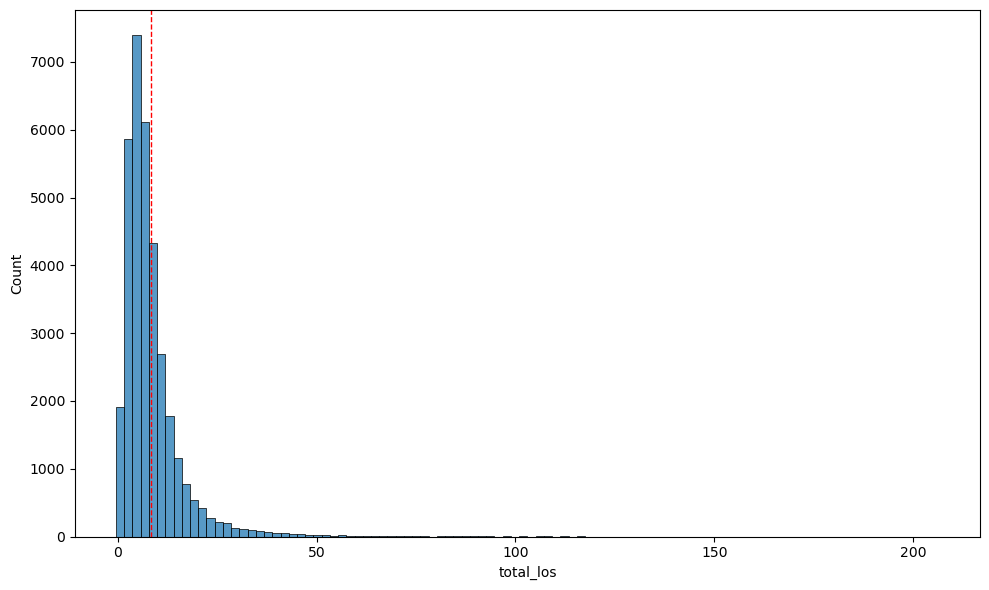

In [14]:
# Histogram of total_los and show the mean
fig = plt.figure(figsize=(10, 6))

sns.histplot(p['total_los'], bins=100)
plt.axvline(p['total_los'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.tight_layout()

# Save the plot
plt.savefig('./figures/4.2.png')

print("Mean total_los: ", p['total_los'].mean())
plt.show()

Tiếp theo chúng tôi tiến hành quan sát về các loại bảo hiểm mà các bệnh nhân sử dụng.
Chúng tôi nhận thấy những bệnh nhân tự chi trả viện phí có số ngày nằm viện thấp hơn hẳn
những bệnh nhân có sử dụng bảo hiểm. Điều này rất hợp lí vì chúng ta đều biết chi phí y tế ở Mỹ
(nơi bộ dữ liệu MIMIC-III được thu thập) vô cùng đắt đỏ nếu không có bảo hiểm.

In [16]:
# Mean of total_los by Insurance
print(p.groupby('insurance')['total_los'].mean())

insurance
Government    8.084802
Medicaid      9.268315
Medicare      8.535177
Private       8.044658
Self Pay      5.990879
Name: total_los, dtype: float64


In [17]:
# Number of patients by insurance
print(p['insurance'].value_counts())

insurance
Medicare      18317
Private       11846
Medicaid       2782
Government     1050
Self Pay        477
Name: count, dtype: int64


In [23]:
# Table of number of patients and mean total_los by insurance
number_of_patients = p['insurance'].value_counts()
los_by_insurance = p.groupby('insurance')['total_los'].mean()

table = pd.concat([number_of_patients, los_by_insurance], axis=1)
table.columns = ['Number of Patients', 'Mean Total LOS']
table.reset_index(inplace=True)
table.to_csv('./show_table/4.11.csv', index=False)
table

,insurance,Number of Patients,Mean Total LOS
0,Medicare,18317,8.535177
1,Private,11846,8.044658
2,Medicaid,2782,9.268315
3,Government,1050,8.084802
4,Self Pay,477,5.990879
